In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.signal import argrelmin
from Astrodynamics import *

In [2]:
G = 6.67430e-11                                             #  N m^2 kg^-2
m_probe, M_star = 900, 1.98847e30                           #  kg
M_home, M_dest, M_moon = 5.9722e24, 1.9e27, 7.34767309e22   #  kg
a_initial, a_home, a_moon = 7e6, 150e9, 384748e3            #  m
P_dest = 12 * 365 * 24 * 60**2                              #  s
a_dest = np.cbrt(G * M_star * P_dest**2 / (4 * np.pi**2))   #  K2L
v_initial = np.sqrt(G * M_home / a_initial)                 #  m/s
v_esc = v_initial * np.sqrt(2)                              #  m/s
v_home = np.sqrt(G * M_star / a_home)                       #  m/s
r_earth, r_sun, r_moon = 6371e3, 6.957e8, 1737.4e3          #  m
r_jupiter  = 7.1492e7                                       #  m
AU = 149597871000                                           #  m

solsys = create_advanced_system()
EM = solsys.satellites["EarthMoonSystem"]

In [3]:
angle = 3.785094
soi = solsys.satellites["Jupiter"].SOI
x_0 = np.cos(angle) * soi
y_0 = np.sin(angle) * soi
vx_0 = 6070.605650 
v_0 = 7479.919090
vy_0 = np.sqrt(v_0**2 - vx_0**2)
state_0 = [x_0, y_0, 0, vx_0, vy_0, 0]
r_vector = np.array([x_0, y_0, 0])
v_vector = np.array([vx_0, vy_0, 0])
h_vector = np.cross(r_vector, v_vector)

hyp = OrbitalProperties("state vectors", [solsys.satellites["Jupiter"], r_vector, v_vector])
hyp

C:\Users\16084\OneDrive\Documents\python_projects\Astrodynamics.py:98: RuntimeWarning: invalid value encountered in true_divide
  lat = np.arctan2(np.divide(position[2], np.sin(inclination)), (position[0] * np.cos(long_asc) + position[1] * np.sin(long_asc)))
C:\Users\16084\OneDrive\Documents\python_projects\Astrodynamics.py:102: RuntimeWarning: invalid value encountered in sqrt
  ecc_anom = 2 * np.arctan(np.sqrt((1 - e) / (1 + e)) * np.tan(nu / 2))


Hyperbolic orbit with semi-major axis -2499151.6km and eccentricity 1.1

In [4]:
# Figure out the mechanics of the encounter
# Update plotting functions to allow for 3D trajectories
#   Use ax.subplots for each plane (XY, YZ, XZ)

In [5]:
solsys.set_true_anomaly("Jupiter", 0)

SunEarthMoonSystemJupiterSystem

In [6]:
AU = 149597871000              #  m
5.2038 * AU

778477401109.8

In [7]:
test3 = Simulate(solsys)
test3.draw_state_from_system("Jupiter", "EarthMoonSystem")
test3.make_probe(Body("Probe", 900, 0), solsys, np.array([4.6038 * AU, 2*AU, 1]), np.array([-1e3, 7e3, -2000]))
test3.simulate(180.8, timestep="days")
# r, t = test3.simulate(200, timestep="days")
# arr = test3.primary.orbit.position
# arr

Found encounter with primary at i[749128] (180.59003065337424 days) at 48214225235.22016
Closest approach with secondary: 738915.6210330608Mm


Simulation object with primary secondary probe

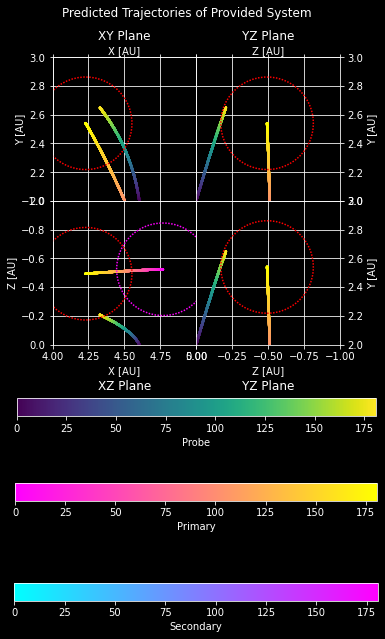

In [8]:
test3.plot_simulation(x_window=[4, 5], y_window=[2, 3], z_window=[0, -1], encounter=749128, markevery=100)

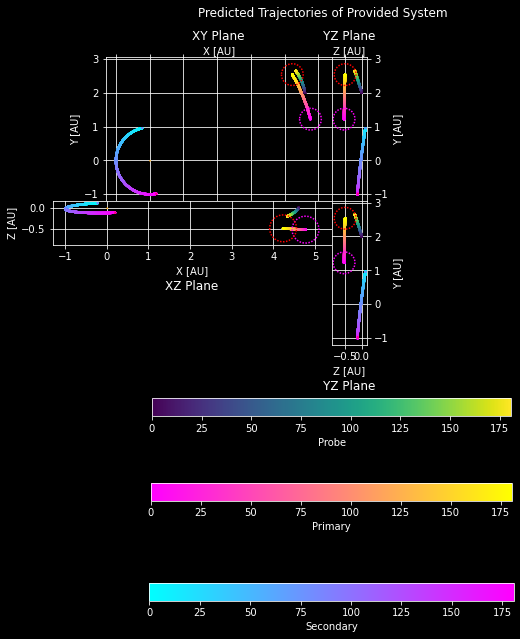

In [9]:
test3.plot_simulation(encounter=749128, markevery=100)

In [10]:
if hasattr(test3, "primary"): test3.primary = test3.primary.apply_state_vectors(749128)
if hasattr(test3, "secondary"): test3.secondary = test3.secondary.apply_state_vectors(749128)
if hasattr(test3, "probe"): test3.probe = test3.probe.apply_state_vectors(749128)

    
primary_soi = test3.primary.SOI

probe_x, probe_y, probe_z = test3.probe.orbit.position
probe_vx, probe_vy, probe_vy = test3.probe.orbit.velocity
primary_x, primary_y, primary_z = test3.primary.orbit.position
primary_vx, primary_vy, primary_vy = test3.primary.orbit.velocity

probe_fpa = test3.probe.orbit.flight_path_angle()
primary_fpa = test3.primary.orbit.flight_path_angle()

r = np.sqrt((probe_x - primary_x)**2 + (probe_y - primary_y)**2 + (probe_z - primary_z)**2)

In [11]:
probe_pos = test3.probe.orbit.position
probe_vel = test3.probe.orbit.velocity
primary_pos = test3.primary.orbit.position
primary_vel = test3.primary.orbit.velocity

(primary_pos - probe_pos) / AU

array([-0.09992406, -0.10725423, -0.28702607])

In [12]:
primary_pos, probe_pos

(array([ 6.32866353e+11,  3.79957838e+11, -7.37617863e+10]),
 array([ 6.47814780e+11,  3.96002843e+11, -3.08232970e+10]))

In [13]:
primary_vel - probe_vel

array([-2652.49567886,  6508.32769186,  2415.29231106])

In [14]:
primary_vel, probe_vel

(array([-6844.03141638, 11849.9260398 ,   488.44465752]),
 array([-4191.53573753,  5341.59834794, -1926.84765354]))

C:\Users\16084\OneDrive\Documents\python_projects\Astroplotters.py:55: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, r_peri, r_0, r_apo, r.max()], [0, r"$r_{peri}$", r"$r_{circ}$", r"$r_{apo}$", "max"])


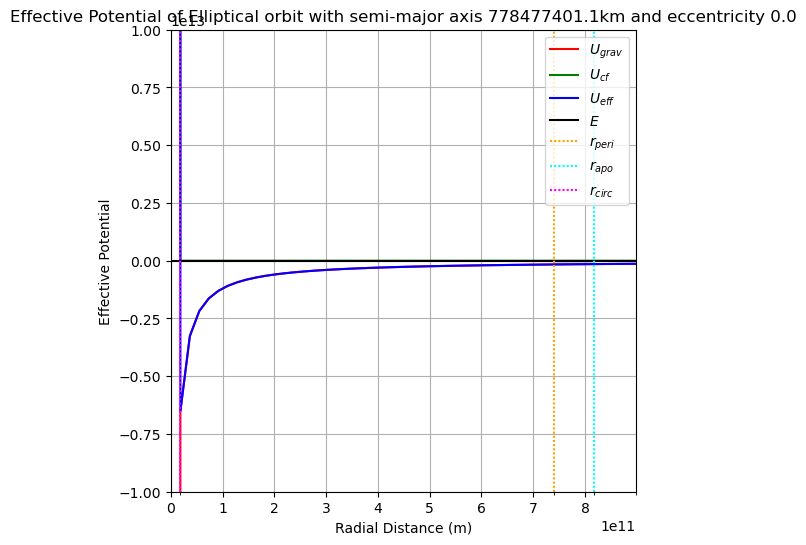

In [15]:
solsys.satellites["Jupiter"].orbit.plot_potential()

In [16]:
if

SyntaxError: invalid syntax (<ipython-input-16-9d526553a371>, line 1)

In [ ]:
primary_soi = test3.primary.SOI

r = r - primary_soi
r[r - primary_soi < 0] = primary_soi
r.argrelmin()

In [ ]:
magnitude(test3.primary.orbit.velocity), magnitude(test3.probe.orbit.velocity)

In [ ]:
primary_soi / AU

In [ ]:
a, va = np.array([1, -2, 0]), np.array([0, 2, 0])
b, vb = np.array([1, 0, 0]), np.array([0, 1, 0])
a- b, va - vb

In [ ]:
test3.primary.true_anomaly()

In [ ]:
test3.primary.eccentric_anomaly()

In [ ]:
test3.primary.orbit

In [ ]:
vars(test3)

In [ ]:
test = Simulate(test3, from_simulation=True)
test

In [ ]:
test.simulate(300, timestep="days")
test

In [ ]:
vars(test.probe.orbit)

In [ ]:
# 